In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [15]:
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


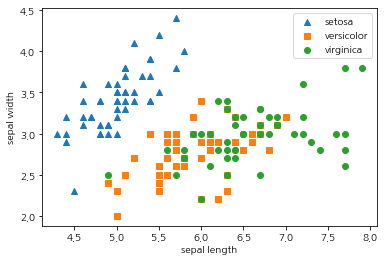

In [17]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는2, 각 target별로 다른 모양으로 산점도 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF[ irisDF['target'] == i]['sepal_length']
    y_axis_data = irisDF[ irisDF['target'] == i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler

In [21]:
# Target 값을 제외한 모든 속성 값을 StandardScaler를 이ㅛㅇ해 표준 정규분포 가지는 값으로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [25]:
# PCA 변환된 데이터의 칼럼 명을 각각 pca_component_1, pca_component_2로 정함
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


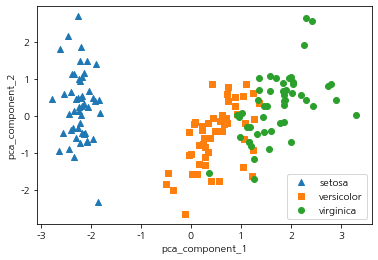

In [27]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는2, 각 target별로 다른 모양으로 산점도 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[ irisDF['target'] == i]['pca_component_1']
    y_axis_data = irisDF_pca[ irisDF['target'] == i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [28]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

In [30]:
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [31]:
rcf = RandomForestClassifier(random_state=156)
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
원본 데이터 평균 정확도: 0.88
